In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [3]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

IndentationError: expected an indented block (DataPreprocessing.py, line 8)

In [200]:
dataframe = pd.read_csv('Data/50_Startup.csv')

In [201]:
dataframe.sample()

,R&D Spend,Administration,Marketing Spend,State,Profit
35,46014.02,85047.44,205517.64,New York,96479.51


In [202]:
dataframe = preprocess_obj.one_hot_encoder(dataframe)

In [203]:
dataframe.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [204]:
dataframe= dataframe.rename(columns={'Profit':'y'})

In [205]:
# Removing one row of categorical data inorder to not to stuck in 
dataframe = dataframe.drop('State_New York', axis=1)

In [206]:
dataframe.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
y                   0
State_California    0
State_Florida       0
dtype: int64

In [207]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
R&D Spend           50 non-null float64
Administration      50 non-null float64
Marketing Spend     50 non-null float64
y                   50 non-null float64
State_California    50 non-null uint8
State_Florida       50 non-null uint8
dtypes: float64(4), uint8(2)
memory usage: 1.7 KB


In [208]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
y,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83
State_California,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00
State_Florida,50.0,0.3200,0.471212,0.00,0.0000,0.000,1.0000,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2904c2c6d8>,
      dtype=object)

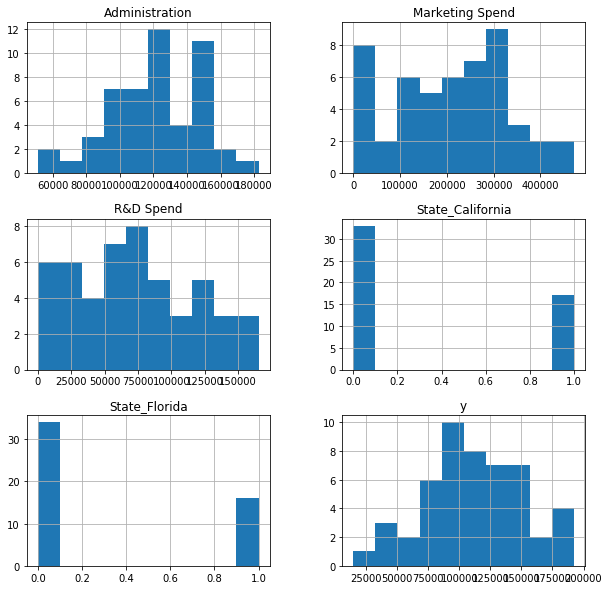

In [209]:
dataframe.hist(figsize=(10,10))

In [210]:
(dataframe==0).sum()

R&D Spend            2
Administration       0
Marketing Spend      3
y                    0
State_California    33
State_Florida       34
dtype: int64

In [211]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
y,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83
State_California,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00
State_Florida,50.0,0.3200,0.471212,0.00,0.0000,0.000,1.0000,1.00


Accuracy using R2 score is  93.46154505630489 %

mae: 6520.697183079727, mse: 7867.855133539707
[ 7.90840255e-01  3.01968165e-02  3.10148566e-02 -3.04799573e+02
  1.58229418e+02]


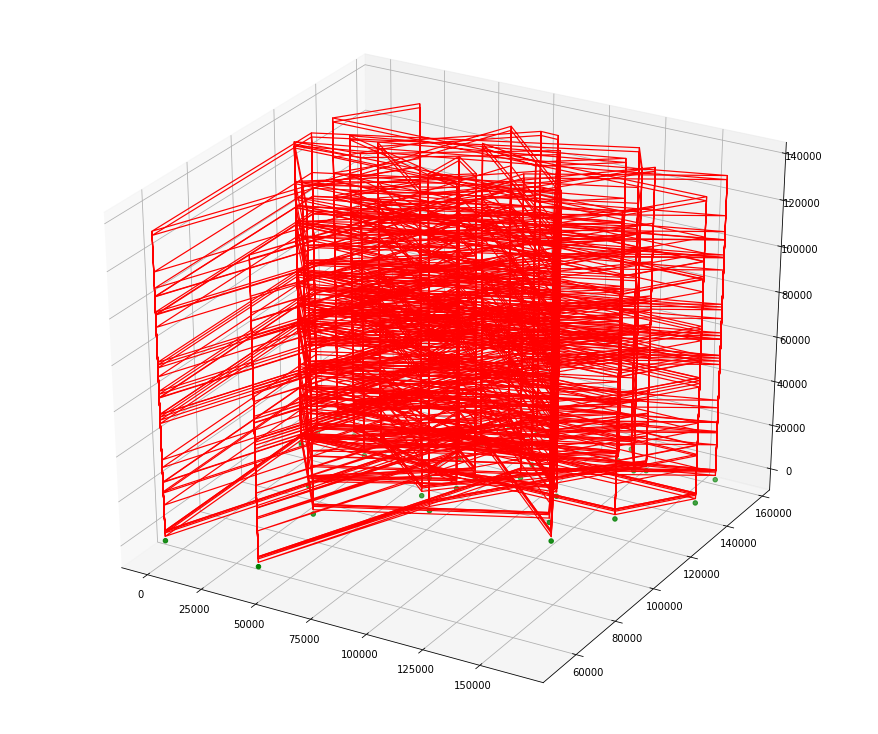

In [274]:
class MultiLinearRegression:
    
    def init(self):
        print("In Multi linear regression")
    
    def multi_Linear_Regression_demo(self,dataframe):
        fig = plt.figure(figsize=(12,10))
        ax = Axes3D(fig)
        Y_train = dataframe['y']
        traindata = dataframe.drop('y', axis=1)
        traindata, test_data, Y_train,  Y_test = train_test_split(traindata,Y_train,test_size = 0.3, random_state=0)
        linear_reg = LinearRegression(normalize=True)
        linear_reg.fit(traindata,Y_train)
        Ypred = linear_reg.predict(test_data)
        error_mae = mean_absolute_error(Ypred,Y_test)
        error_rmse = mean_squared_error(Ypred,Y_test)
        accuracy = r2_score(Ypred,Y_test)*100
#         plt.scatter(traindata,Y_train,marker='*',color='r')
#         plt.plot([-2,4],linear_reg.predict(np.array([-2,4]).reshape(2,1)))
#         plt.title('Scattered Points with predicted Line')
        print("Accuracy using R2 score is ",accuracy,'%\n')
        print("mae: {}, mse: {}".format(error_mae,np.sqrt(error_rmse)))
        x0 = traindata.iloc[:,0]
        x1 = traindata.iloc[:,1]
        yp = np.array(np.add(np.multiply(x0,linear_reg.coef_[0]),np.multiply(x1,linear_reg.coef_[1]))).reshape(-1,1)
        ax.scatter(traindata.iloc[:,0],traindata.iloc[:,1],color='g')
        ax.plot_wireframe(X=x0,Y=x1,Z=yp,linewidth = 1.2,color='r')
        print(linear_reg.coef_)
        plt.show()
    
    def main(self,dataframe):
        self.multi_Linear_Regression_demo(dataframe)

if __name__ == '__main__':
    obj = MultiLinearRegression()
    obj.main(dataframe)
